In [105]:
#%matplotlib notebook

#!/usr/bin/env python
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import pylab
from mpl_toolkits.basemap import Basemap as Basemap
import networkx as nx

<IPython.core.display.Javascript object>


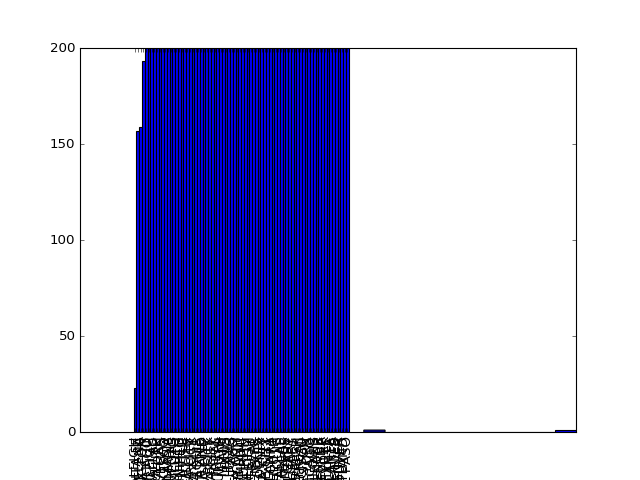

[83, 160]


In [33]:
A_star = 83
Path = 160

x = [A_star, Path]

axes = plt.gca()
#axes.set_xlim([xmin,xmax])
axes.set_ylim([0,200])

print x

n, bins, patches = plt.hist(x)

plt.show()

<IPython.core.display.Javascript object>


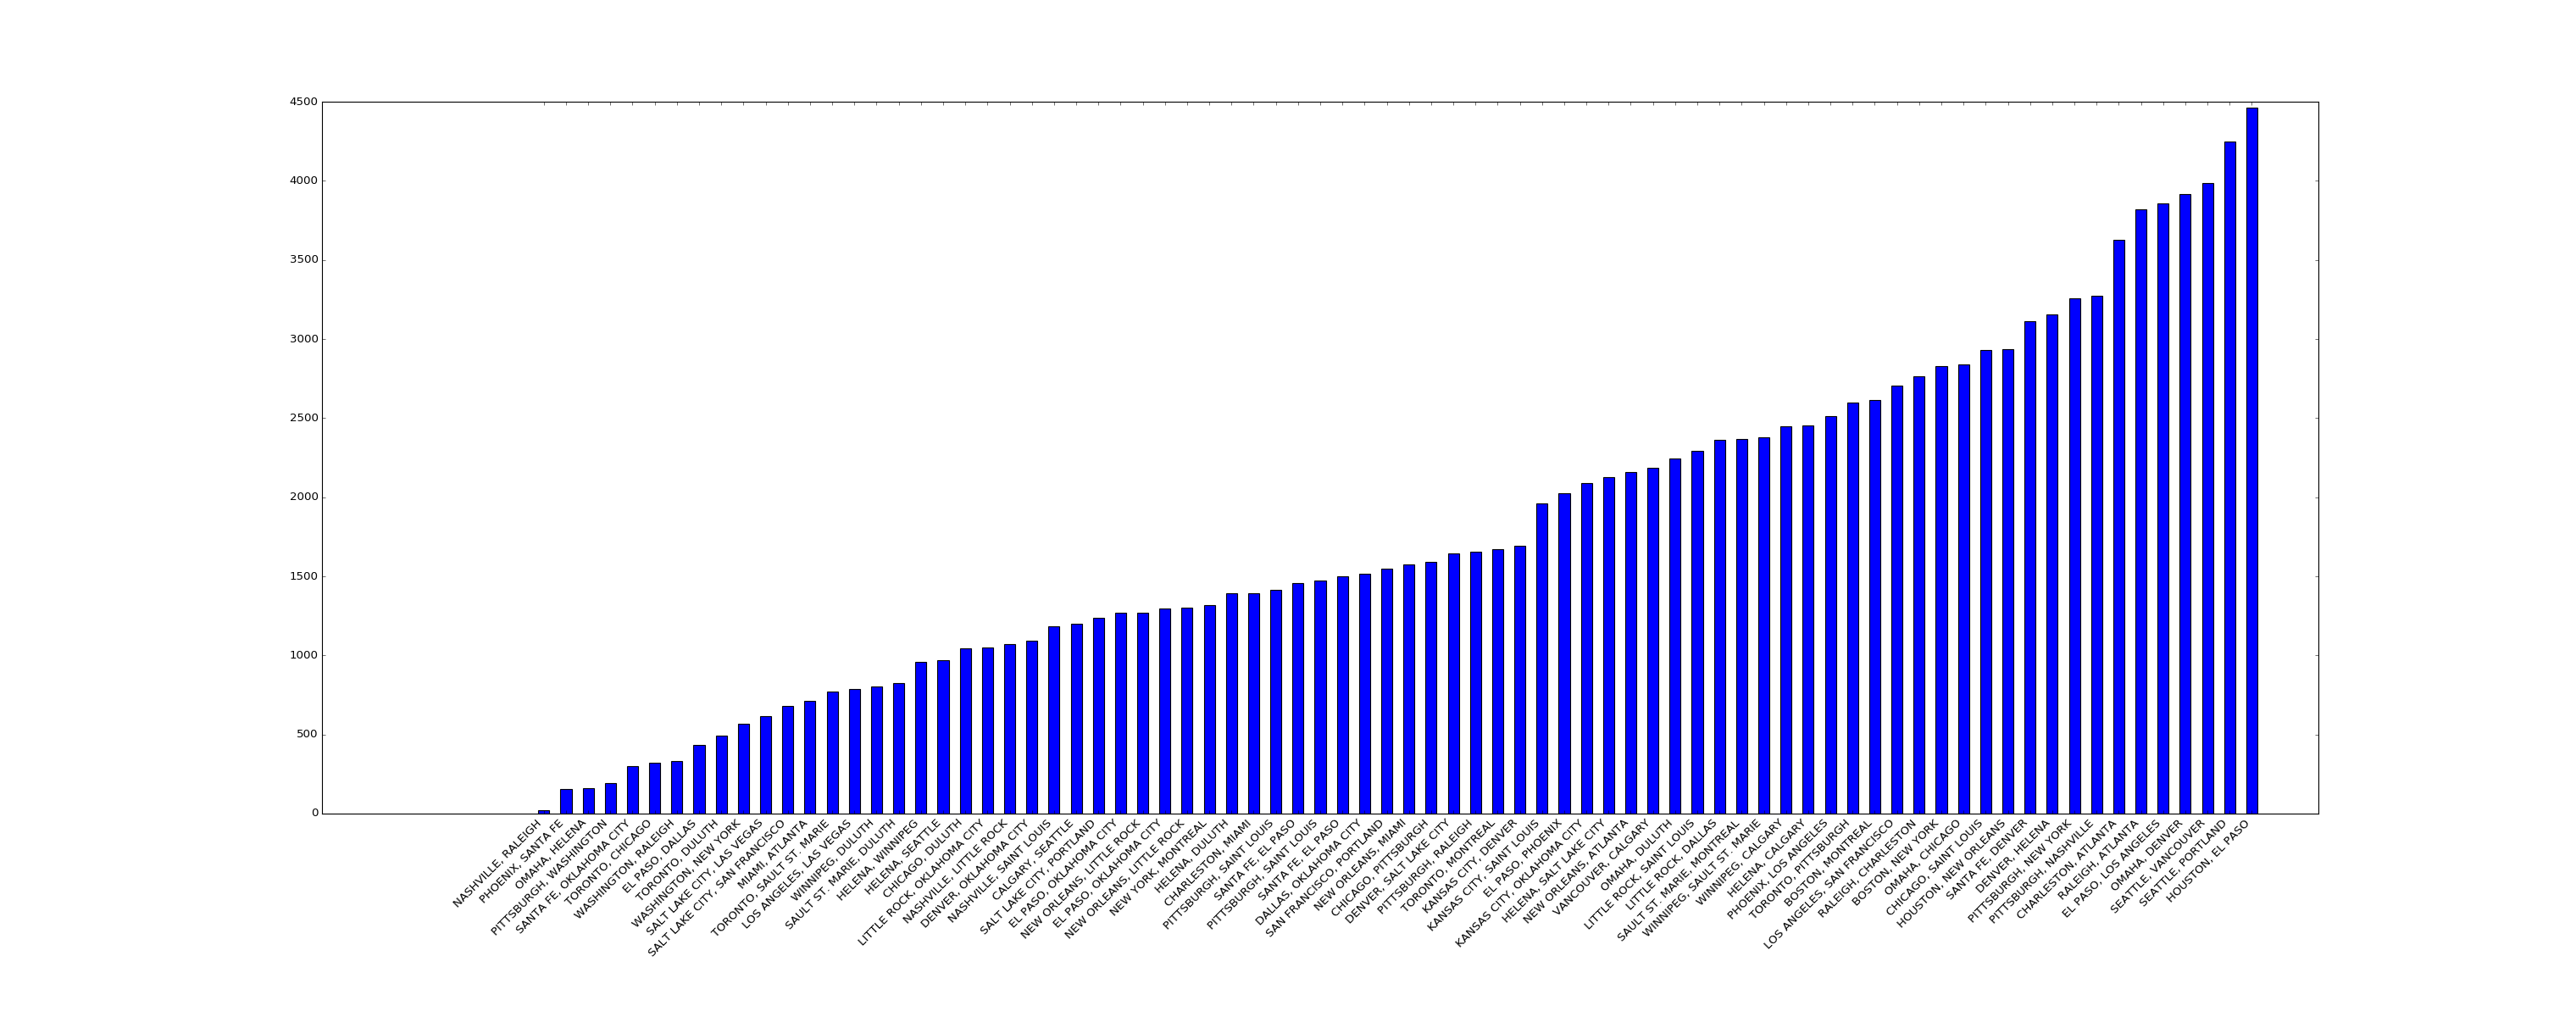

In [52]:
data = {}
data['HELENA, DULUTH'] = 1302
data['RALEIGH, CHARLESTON'] = 2515
data['SEATTLE, VANCOUVER'] = 3629
data['OMAHA, HELENA'] = 159
data['HELENA, SALT LAKE CITY'] = 1692
data['LOS ANGELES, LAS VEGAS'] = 786
data['PITTSBURGH, NEW YORK'] = 2929
data['DENVER, OKLAHOMA CITY'] = 1094
data['ATLANTA, NASHVILLE'] = 4463
data['CHICAGO, DULUTH'] = 1047
data['LITTLE ROCK, SAINT LOUIS'] = 2126
data['TORONTO, SAULT ST. MARIE'] = 774
data['NEW ORLEANS, MIAMI'] = 1471
data['CHARLESTON, ATLANTA'] = 3114
data['WINNIPEG, DULUTH'] = 803
data['EL PASO, PHOENIX'] = 1655
data['PITTSBURGH, WASHINGTON'] = 193
data['PITTSBURGH, NASHVILLE'] = 2934
data['OMAHA, CHICAGO'] = 2615
data['KANSAS CITY, OKLAHOMA CITY'] = 1671
data['WASHINGTON, NEW YORK'] = 568
data['SAN FRANCISCO, PORTLAND'] = 1458
data['SAULT ST. MARIE, MONTREAL'] = 2186
data['EL PASO, LOS ANGELES'] = 3255
data['SANTA FE, EL PASO'] = 1395
data['PHOENIX, LOS ANGELES'] = 2370
data['HELENA, SEATTLE'] = 967
data['PITTSBURGH, SAINT LOUIS'] = 1395
data['CHICAGO, PITTSBURGH'] = 1502
data['NEW ORLEANS, ATLANTA'] = 1961
data['NASHVILLE, RALEIGH'] = 23
data['LOS ANGELES, SAN FRANCISCO'] = 2452
data['PHOENIX, SANTA FE'] = 157
data['SALT LAKE CITY, SAN FRANCISCO'] = 679
data['SEATTLE, PORTLAND'] = 3818
data['EL PASO, DALLAS'] = 436
data['KANSAS CITY, DENVER'] = 1591
data['LITTLE ROCK, OKLAHOMA CITY'] = 1050
data['CALGARY, SEATTLE'] = 1202
data['SANTA FE, OKLAHOMA CITY'] = 301
data['OMAHA, DULUTH'] = 2091
data['OMAHA, KANSAS CITY'] = 3986
data['TORONTO, CHICAGO'] = 322
data['HOUSTON, EL PASO'] = 3857
data['OMAHA, DENVER'] = 3275
data['CHICAGO, SAINT LOUIS'] = 2705
data['SANTA FE, DENVER'] = 2827
data['BOSTON, MONTREAL'] = 2449
data['TORONTO, MONTREAL'] = 1575
data['NEW ORLEANS, LITTLE ROCK'] = 1268
data['SAULT ST. MARIE, DULUTH'] = 823
data['TORONTO, PITTSBURGH'] = 2381
data['NEW YORK, MONTREAL'] = 1296
data['NASHVILLE, SAINT LOUIS'] = 1182
data['SALT LAKE CITY, PORTLAND'] = 1238
data['DENVER, PHOENIX'] = 3918
data['HELENA, WINNIPEG'] = 957
data['RALEIGH, ATLANTA'] = 3156
data['DALLAS, OKLAHOMA CITY'] = 1414
data['WASHINGTON, RALEIGH'] = 334
data['WINNIPEG, SAULT ST. MARIE'] = 2242
data['NASHVILLE, LITTLE ROCK'] = 1070
data['LITTLE ROCK, DALLAS'] = 2158
data['VANCOUVER, CALGARY'] = 2024
data['TORONTO, DULUTH'] = 495
data['KANSAS CITY, SAINT LOUIS'] = 1643
data['MIAMI, ATLANTA'] = 712
data['WINNIPEG, CALGARY'] = 2291
data['HELENA, CALGARY'] = 2364
data['HOUSTON, NEW ORLEANS'] = 2764
data['PITTSBURGH, RALEIGH'] = 1549
data['HOUSTON, DALLAS'] = 4248
data['SALT LAKE CITY, LAS VEGAS'] = 617
data['EL PASO, OKLAHOMA CITY'] = 1268
data['DENVER, SALT LAKE CITY'] = 1515
data['CHARLESTON, MIAMI'] = 1316
data['BOSTON, NEW YORK'] = 2597
data['DENVER, HELENA'] = 2838

x = sorted(data.values())

y = []

for val in x:
    for key in data:
        if data[key] == val:
            y.append(key)

widthscale = len(data)/4 
figsize = (2*widthscale,15) # fig size in inches (width,height)
figure = pylab.figure(figsize = figsize) # set the figsize

ax = figure.add_subplot(1,1,1)

ax.bar(range(len(data)), x, .5, align='center')
ax.set_xticks(range(len(data)))
ax.set_xticklabels(y)

for label in ax.get_xticklabels(): 
      label.set_horizontalalignment('center') 

figure.autofmt_xdate(rotation=45)

pylab.show()
#plt.show()

<IPython.core.display.Javascript object>


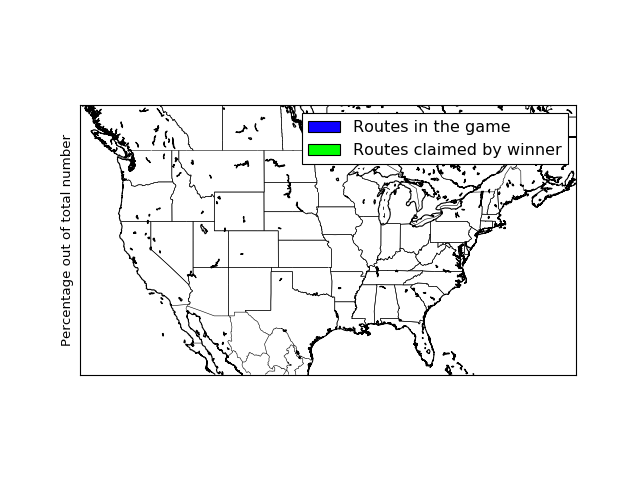

In [65]:
x_route_freq = [0.064, 0.32, 0.2179, 0.192, 0.089, 0.115]
x_claim_freq = [0.1433, 0.33, 0.1522, 0.1735, 0.0789, 0.121833]

N = 6

ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind, x_route_freq, width, color='#0D00FF')

rects2 = ax.bar(ind + width, x_claim_freq, width, color='#00FF00')

# add some text for labels, title and axes ticks
#ax.set_ylabel('Percentage out of total number')
ax.set_xticks(ind + width)
ax.set_xticklabels(('size 1', 'size 2', 'size 3', 'size 4', 'size 5', 'size 6'))

#ax.legend((rects1[0], rects2[0]), ('Routes in the game', 'Routes claimed by winner'))

plt.show()

In [71]:
import re

#import matplotlib.pyplot as plt

def loadgraphfromfile(filename):
	file = open(filename, 'r')
	line = file.readline()

	G = nx.MultiGraph()

	while len(line.strip()) > 0:
		G.add_node(line.strip())
		line = file.readline()

	line = file.readline()
	while len(line.strip()) > 0:
		index = re.search('\d', line).start()
		index_space = line[index+2:].index(' ')
		color = line[index+2:index+2+index_space]
		#print line[index+2:index+2+index_space]]
		node1 = line[:index].strip() if (line[:index].strip())[-1] != ' ' else line[:index-1].strip()
		node2 = line[index+2+index_space:].strip() if (line[index+2+index_space:].strip())[-1] != ' ' else (line[index+2+index_space:].strip())[:-1]
		G.add_edge(node1, node2, weight=int(line[index]), color=color)
		line = file.readline()

	for e in G.edges():
		for me in G[e[0]][e[1]]:
			G[e[0]][e[1]][me]['owner'] = -1
		#e['owner'] = -1

	return G

<IPython.core.display.Javascript object>


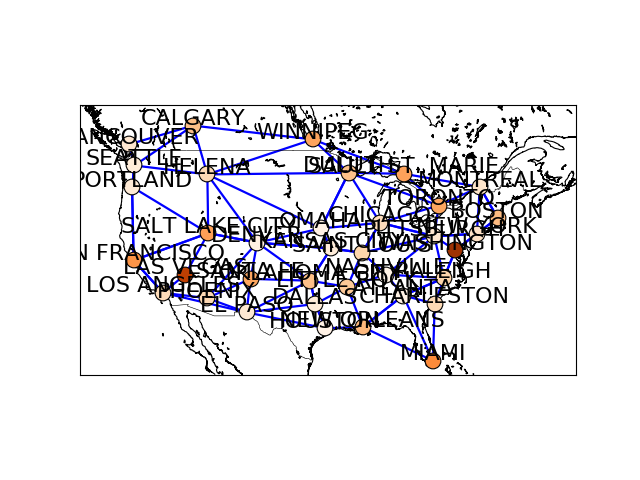

In [106]:
data2 = {}

data2['TORONTO'] = 4039
data2['OMAHA'] = 319
data2['PITTSBURGH'] = 1169
data2['BOSTON'] = 3250
data2['LITTLE ROCK'] = 2764
data2['SAINT LOUIS'] = 2236
data2['HELENA'] = 1964
data2['NEW YORK'] = 1509
data2['SALT LAKE CITY'] = 4308
data2['RALEIGH'] = 2259
data2['HOUSTON'] = 238
data2['DALLAS'] = 818
data2['DENVER'] = 391
data2['WINNIPEG'] = 4112
data2['EL PASO'] = 1098
data2['LAS VEGAS'] = 8133
data2['LOS ANGELES'] = 1859
data2['CHARLESTON'] = 1916
data2['ATLANTA'] = 289
data2['SEATTLE'] = 817
data2['SAULT ST. MARIE'] = 4205
data2['CHICAGO'] = 1775
data2['MIAMI'] = 5062
data2['SANTA FE'] = 4029
data2['WASHINGTON'] = 8981
data2['KANSAS CITY'] = 815
data2['VANCOUVER'] = 1222
data2['CALGARY'] = 3162
data2['SAN FRANCISCO'] = 4706
data2['PORTLAND'] = 935
data2['PHOENIX'] = 2062
data2['NASHVILLE'] = 227
data2['DULUTH'] = 3062
data2['NEW ORLEANS'] = 3376
data2['OKLAHOMA CITY'] = 3104
data2['MONTREAL'] = 1344

max_val = 0

for key in data2:
    if max_val < data2[key]:
        max_val = data2[key]

color_data = {}

for key in data2:
    color_data[key] = float(data2[key]) / float(10000)

#print color_data

m = Basemap(
			projection='merc',
			llcrnrlon=-130,
			llcrnrlat=24,
			urcrnrlon=-60,
			urcrnrlat=53,
			lat_ts=0,
			resolution='i',
			suppress_ticks=True)

map_coord = {'VANCOUVER': {'x': 49.564963, 'y': -123.062702},
	'CALGARY': {'x': 51.251020, 'y': -114.026557},
	'WINNIPEG': {'x': 50.010978, 'y': -97.154732},
	'SAULT ST. MARIE': {'x': 46.791630, 'y': -84.286244},
	'MONTREAL': {'x': 45.503987, 'y': -73.568746},
	'SEATTLE': {'x': 47.589454, 'y': -122.318512},
	'TORONTO': {'x': 43.641723, 'y': -79.387558},
	'BOSTON': {'x': 42.355750, 'y': -71.055807},
	'HELENA': {'x': 46.731739, 'y': -112.027148},
	'DULUTH': {'x': 46.888493, 'y': -92.078888},
	'PORTLAND': {'x': 45.509640, 'y': -122.654604},
	'NEW YORK': {'x': 40.692428, 'y': -73.998671},
	'PITTSBURGH': {'x': 40.413313, 'y': -79.993355},
	'CHICAGO': {'x': 41.852272, 'y': -87.629942},
	'OMAHA': {'x': 41.254117, 'y': -95.997963},
	'WASHINGTON': {'x': 38.894640, 'y': -77.042346},
	'SAINT LOUIS': {'x': 38.622955, 'y': -90.200017},
	'KANSAS CITY': {'x': 39.094362, 'y': -94.586185},
	'DENVER': {'x': 39.728466, 'y': -104.989352},
	'SALT LAKE CITY': {'x': 40.751569, 'y': -111.902025},
	'SAN FRANCISCO': {'x': 37.779881, 'y': -122.428586},
	'RALEIGH': {'x': 35.775136, 'y': -78.638468},
	'NASHVILLE': {'x': 36.179663, 'y': -86.791265},
	'LITTLE ROCK': {'x': 34.755320, 'y': -92.290129},
	'OKLAHOMA CITY': {'x': 35.473889, 'y': -97.508375},
	'SANTA FE': {'x': 35.687297, 'y': -105.935572},
	'LAS VEGAS': {'x': 36.174911, 'y': -115.146240},
	'LOS ANGELES': {'x': 34.073030, 'y': -118.276788},
	'PHOENIX': {'x': 33.447244, 'y': -112.071539},
	'EL PASO': {'x': 31.751809, 'y': -106.488188},
	'DALLAS': {'x': 32.757476, 'y': -96.792232},
	'ATLANTA': {'x': 33.754522, 'y': -84.391658},
	'CHARLESTON': {'x': 32.791175, 'y': -79.935731},
	'MIAMI': {'x': 25.763988, 'y': -80.193837},
	'NEW ORLEANS': {'x': 29.985846, 'y': -90.082514},
	'HOUSTON': {'x': 29.829152, 'y': -95.365634}}

A = loadgraphfromfile('usa.txt')

pos = {}
pos_label = {}
for x in map_coord:
	pos[x] = m(map_coord[x]['y'], map_coord[x]['x'])
	pos_label[x] = (pos[x][0], pos[x][1] + 100000.0)

m.drawcoastlines()
m.drawcountries()
#m.drawstates()

# nodes
for node in A:
    G = nx.Graph()
    if node in color_data:
        G.add_node(node)
        color = pylab.cm.Oranges(color_data[node])
        c = [color[0], color[1], color[2], color[3]]
        nx.draw_networkx_nodes(G,pos,node_size=200, node_color=c)
    else:
        G.add_node(node)
        nx.draw_networkx_nodes(G,pos,node_size=200, node_color='#ff0000')
        
nx.draw_networkx_edges(A,pos,edgelist=A.edges(),width=2,edge_color='#0000ff')
nx.draw_networkx_labels(A,pos=pos_label,font_size=20,font_family='sans-serif')

plt.show()